In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
surv_data = pd.read_csv('train.csv', index_col='PassengerId')
surv_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Context

In [4]:
surv_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


# Data quality assessment

In [5]:
surv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [18]:
surv_data['Cabin'].value_counts()

C19828    6
C19623    5
A9127     5
C9485     5
C12152    5
         ..
C17728    1
B19299    1
C20998    1
D12267    1
D19538    1
Name: Cabin, Length: 26992, dtype: int64

# Data exploration

<AxesSubplot:xlabel='Survived', ylabel='Age'>

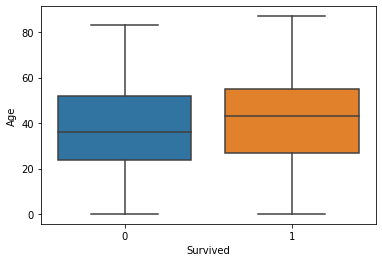

In [6]:
sns.boxplot(x='Survived', y='Age', data=surv_data)

<AxesSubplot:xlabel='Survived', ylabel='Quantity'>

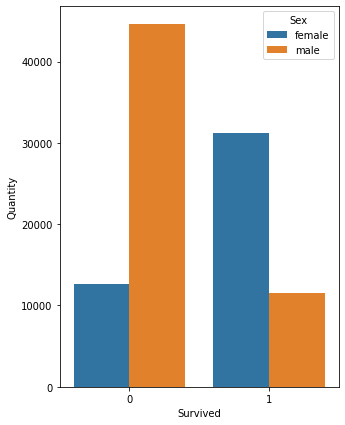

In [7]:
gr_by_surv = surv_data.groupby(['Survived','Sex'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})
plt.figure(figsize=(5,7))
sns.barplot(x=gr_by_surv['Survived'], y=gr_by_surv['Quantity'], hue=gr_by_surv['Sex'])

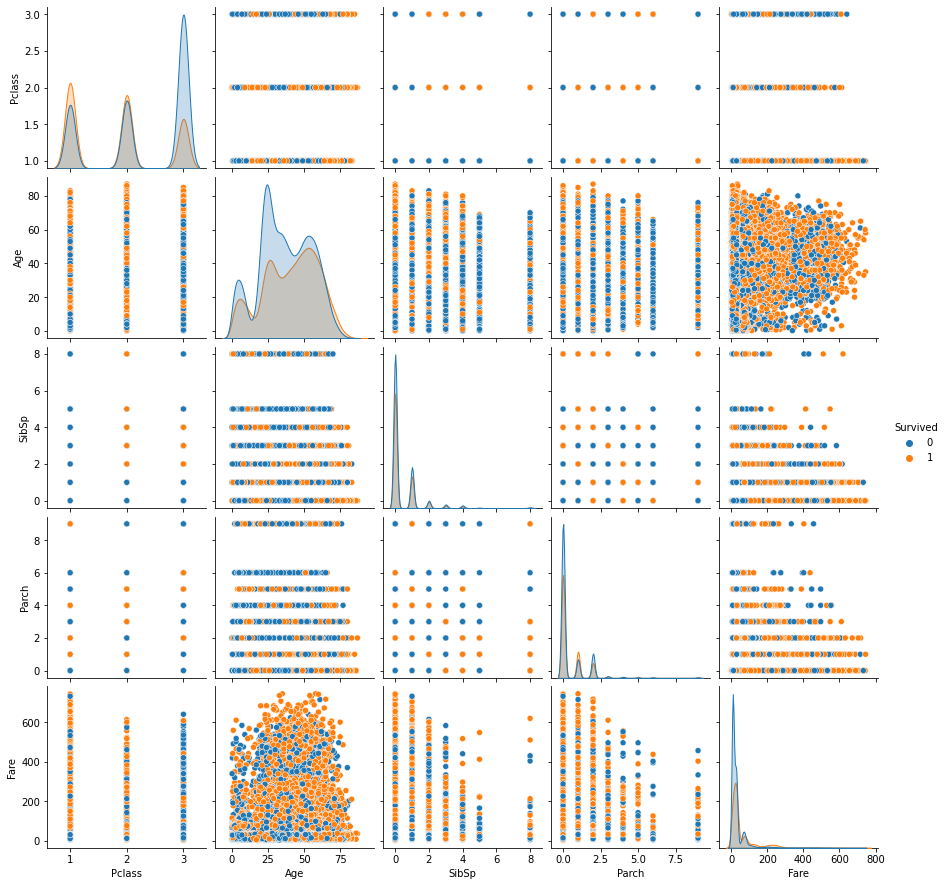

In [8]:
sns.pairplot(data=surv_data, hue='Survived')

  Embarked  Survived  Quantity
0        C         0      5518
1        C         1     16669
2        Q         0      2186
3        Q         1      3238
4        S         0     49394
5        S         1     22745


<AxesSubplot:xlabel='Embarked', ylabel='Quantity'>

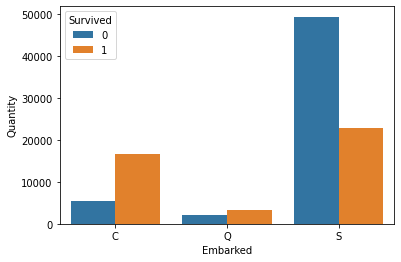

In [16]:
gr_by_emb = surv_data.groupby(['Embarked','Survived'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})
sns.barplot(x=gr_by_emb['Embarked'], y=gr_by_emb['Quantity'], hue=gr_by_emb['Survived'])

# Summary